In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime, timedelta
import glob,os

In [2]:
ans = raw_input('Please enter the full directory for files:')
try:
    dirname = str(ans)
    os.chdir(dirname)
except:
    dirname = "/Users/AAA218/Desktop/ami_sg/canteen_count_5APs.csv/"
    print'not valid, using defaults: %s' % dirname
    os.chdir(dirname)
l = list()
for file in glob.glob("*.csv"):
        l.append(file)

print l

Please enter the full directory for files:dfd
not valid, using defaults: /Users/AAA218/Desktop/ami_sg/canteen_count_5APs.csv/


In [7]:
dflist = []
for f in l:
    d = f[14:24]
    print 'date: ',d
    fname = dirname + f
    test = pd.read_csv(fname, header = 0,sep=',',low_memory= False)
    tt = []
    for i, row in enumerate(test.values):
        t = " ".join([str(d ),str(test.time[i])])
        #t = datetime.strptime(t,'%Y-%m-%d %H:%M:%S')
        tt.append(t)
    print "sample time: ",tt[2]
    test["time"] = tt
    dflist.append(test)
canteen = pd.concat(dflist)
w_file =dirname + 'canteen.csv'
canteen.to_csv(w_file, index = False)

date:  2016-06-15
sample time:  2016-06-15 00:10:01
date:  2016-06-16
sample time:  2016-06-16 00:10:01
date:  2016-06-17
sample time:  2016-06-17 00:10:01
date:  2016-06-18
sample time:  2016-06-18 00:10:02
date:  2016-06-19
sample time:  2016-06-19 00:10:01
date:  2016-06-20
sample time:  2016-06-20 00:10:01
date:  2016-06-21
sample time:  2016-06-21 00:10:01
date:  2016-06-22
sample time:  2016-06-22 00:10:01
date:  2016-06-23
sample time:  2016-06-23 00:10:01
date:  2016-06-24
sample time:  2016-06-24 00:10:01
date:  2016-06-25
sample time:  2016-06-25 00:10:01
date:  2016-06-26
sample time:  2016-06-26 00:10:01
date:  2016-06-27
sample time:  2016-06-27 00:10:01
date:  2016-06-28
sample time:  2016-06-28 00:10:01
date:  2016-06-29
sample time:  2016-06-29 00:10:01
date:  2016-06-30
sample time:  2016-06-30 00:10:01
date:  2016-07-01
sample time:  2016-07-01 00:10:01
date:  2016-07-02
sample time:  2016-07-02 00:10:01
date:  2016-07-03
sample time:  2016-07-03 00:10:01
date:  2016-

In [12]:
dparse= lambda d: datetime.strptime(d,'%Y-%m-%d %H:%M:%S')
can_dat = pd.read_csv('canteen.csv',header=0,parse_dates='time',index_col='time',date_parser=dparse)
print can_dat.head()
print can_dat[150:155]

                     counts
time                       
2016-06-15 00:00:01       9
2016-06-15 00:05:01      10
2016-06-15 00:10:01       9
2016-06-15 00:15:01       6
2016-06-15 00:20:01       7
                     counts
time                       
2016-06-15 08:54:01      90
2016-06-15 08:55:01      97
2016-06-15 08:56:01      83
2016-06-15 08:57:01      88
2016-06-15 08:58:01      91


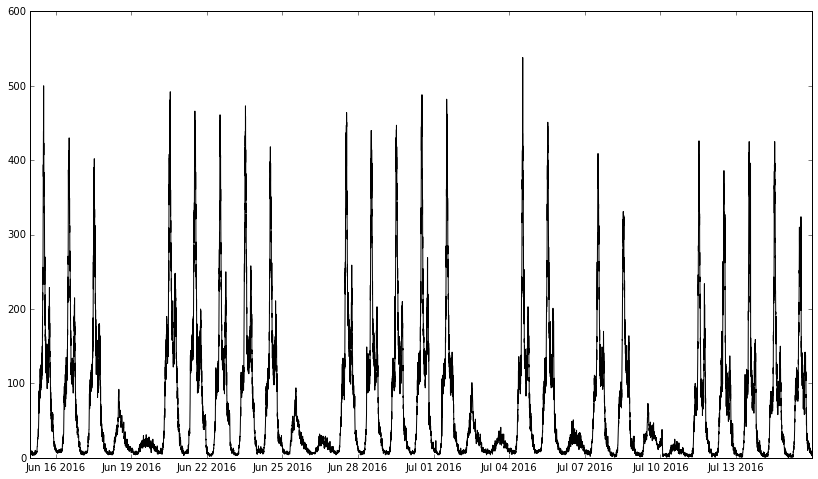

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (14,8))
plt.plot(can_dat,'k')

### Resample using 5 mins mean

In [39]:
can = can_dat.resample('5min', closed= 'left', label = 'left').mean().copy()
#0-4 mins mean as 5min sample
#can["counts"] = can["counts"].astype(int)
print can.head()
print "new daytime: \n" ,can[95:100]

                     counts
time                       
2016-06-15 00:00:00     9.0
2016-06-15 00:05:00    10.0
2016-06-15 00:10:00     9.0
2016-06-15 00:15:00     6.0
2016-06-15 00:20:00     7.0
new daytime: 
                     counts
time                       
2016-06-15 07:55:00    49.0
2016-06-15 08:00:00    52.4
2016-06-15 08:05:00    59.8
2016-06-15 08:10:00    67.2
2016-06-15 08:15:00    77.6


In [40]:
can[can.counts.isnull()]

,counts
time,
2016-07-10 06:05:00,NaN
2016-07-12 03:45:00,NaN
2016-07-14 01:25:00,NaN
2016-07-14 03:20:00,NaN
2016-07-15 01:30:00,NaN
2016-07-15 03:30:00,NaN
2016-07-15 04:35:00,NaN
2016-07-15 04:45:00,NaN
2016-07-15 05:00:00,NaN


### fill the NAs using the previous value

In [43]:
can1 = can_dat.resample('5min', closed= 'left', label = 'left').mean().ffill()
print can1.head()
print can1[can1.counts.isnull()]

                     counts
time                       
2016-06-15 00:00:00     9.0
2016-06-15 00:05:00    10.0
2016-06-15 00:10:00     9.0
2016-06-15 00:15:00     6.0
2016-06-15 00:20:00     7.0
Empty DataFrame
Columns: [counts]
Index: []


In [52]:
can1["counts"] = can1.counts.astype(np.int64)
print "samples: \n",can1.iloc[95:100]
print "data type: \n",can1.counts.dtype

samples: 
                     counts
time                       
2016-06-15 07:55:00      49
2016-06-15 08:00:00      52
2016-06-15 08:05:00      59
2016-06-15 08:10:00      67
2016-06-15 08:15:00      77
data type: 
int64


In [53]:
can1.to_csv("can_even.csv",index=True)

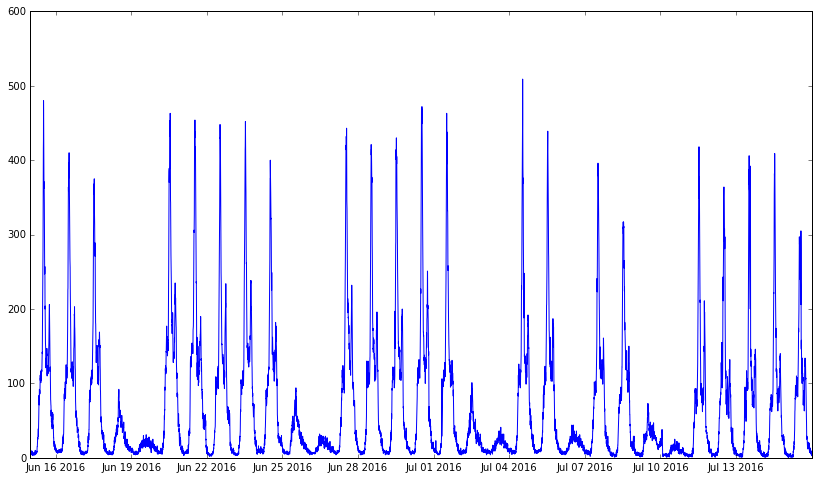

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (14,8))
plt.plot(can1,'b')

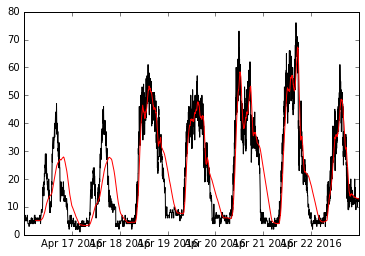

In [29]:
smoth =S2_03.rolling(window = 72).mean()
plt.plot(S2_03,'black')
plt.plot(smoth,'red')

In [4]:
with open('tr_20min.csv') as fi:
    reader = fi.readlines()
sgtime = []
number = []
for line in reader[1:]:
    fid = line.strip().split(',')
    sgtime.append(datetimetime.strptime(str(fid[1]),format = '%Y-%m-%d %H:%M:%s'))
    number.append(int(fid[4]))